<a href="https://colab.research.google.com/github/Juethro/DataQuest_2023_NewQuest/blob/kevin/DataQuest2023_trainpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Library

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tahap-penyisihan-oq-dataquestua

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
!unzip tahap-penyisihan-oq-dataquestua.zip -d datasets

unzip:  cannot find or open tahap-penyisihan-oq-dataquestua.zip, tahap-penyisihan-oq-dataquestua.zip.zip or tahap-penyisihan-oq-dataquestua.zip.ZIP.


In [3]:
import pandas as pd

In [4]:
dft = pd.read_csv("/content/train.csv", delimiter=';')
dft

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06 Celcius,NaN,24.55,131.53 C,24.44 C,25.69,1007,undetermined,NaN,97,0.9,13,0,0,0,0,99
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51°C,NaN,24.17°C,25.58,23.89 C,25.13,1006,undetermined,undetermined,98,0.85 m/s,21.0°,,NaN,NaN,0,100
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63 C,NaN,24.29,129.32,24,126.96 C,1007.0 hPa,NaN,undetermined,98,1.54 m/s,26.0 °,0,NaN,0,no_snow,97
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,NaN,24.71,29.76,25.02 C,27.25 °C,1008,undetermined,NaN,89.00%,1.46m/s,17,0.3 mm,0,0,volume:0,98


#Statistika Deskriptif

In [5]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

In [6]:
len(dft)

341880

In [7]:
dft.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
datetime,341880.0,899379000.0,3.552926e+08,283996800.0,591687900.0,899379000.0,1.207070e+09,1.514761e+09
time-zone,341880.0,28800.0,0.000000e+00,28800.0,28800.0,28800.0,2.880000e+04,2.880000e+04


#Data Prepocessing

In [8]:
dft.drop("time-zone", axis=1, inplace=True)
dft['temp'] = dft['temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['d_point'] = dft['d_point'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['feels'] = dft['feels'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['min_temp'] = dft['min_temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['max_temp'] = dft['max_temp'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['prssr'] = dft['prssr'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['hum'] = dft['hum'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['wind_spd'] = dft['wind_spd'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft['wind_deg'] = dft['wind_deg'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dft["clouds"] = dft["clouds"].str.extract(r'(\d+\.\d+|\d+)').astype(float)

dft["rain_1h"] = dft['rain_1h'].str.replace('zero', '0')
dft['rain_1h'] = dft['rain_1h'].replace('-1m', '-1')
dft["rain_1h"] = dft['rain_1h'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

dft["rain_3h"] = 0
dft["snow_1h"] = 0
dft["snow_3h"] = 0

In [16]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    341880 non-null  int64  
 1   temp        341880 non-null  float64
 2   visibility  51112 non-null   object 
 3   d_point     341880 non-null  float64
 4   feels       341880 non-null  float64
 5   min_temp    341880 non-null  float64
 6   max_temp    341880 non-null  float64
 7   prssr       341880 non-null  float64
 8   sea_level   192964 non-null  object 
 9   grnd_level  192919 non-null  object 
 10  hum         341880 non-null  float64
 11  wind_spd    341880 non-null  float64
 12  wind_deg    341880 non-null  float64
 13  rain_1h     320590 non-null  float64
 14  rain_3h     341880 non-null  int64  
 15  snow_1h     341880 non-null  int64  
 16  snow_3h     341880 non-null  int64  
 17  clouds      341880 non-null  float64
 18  tahun       341880 non-null  int64  
 19  bu

In [17]:
dft.head(20)

,datetime,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds,tahun,bulan
0,283996800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.00,0.82,320.0,0.00,0,0,0,100.0,1979,1
1,284000400,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.00,0.96,338.0,0.00,0,0,0,100.0,1979,1
2,284004000,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.00,1.22,339.0,0.00,0,0,0,99.0,1979,1
3,284007600,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.00,1.08,342.0,0.13,0,0,0,94.0,1979,1
4,284011200,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.00,0.86,336.0,0.34,0,0,0,100.0,1979,1
5,284014800,28.08,NaN,24.92,32.79,27.36,29.40,1010.0,NaN,NaN,83.00,0.84,7.0,3.33,0,0,0,100.0,1979,1
6,284018400,28.68,NaN,24.25,33.29,27.62,31.02,1010.0,undetermined,undetermined,77.00,0.82,309.0,8.01,0,0,0,100.0,1979,1
7,284022000,28.62,NaN,25.85,34.70,28.12,29.35,1010.0,NaN,not recorded,85.00,0.71,291.0,2.54,0,0,0,95.0,1979,1
8,284025600,26.55,NaN,24.21,26.55,26.09,26.83,1009.0,undetermined,undetermined,87.00,0.62,285.0,1.29,0,0,0,97.0,1979,1
9,284029200,26.38,NaN,24.97,26.38,25.68,29.02,1009.0,NaN,undetermined,92.00,0.44,294.0,0.39,0,0,0,92.0,1979,1


In [18]:
dft.isna().sum()

datetime           0
temp               0
visibility    290768
d_point            0
feels              0
min_temp           0
max_temp           0
prssr              0
sea_level     148916
grnd_level    148961
hum                0
wind_spd           0
wind_deg           0
rain_1h        21290
rain_3h            0
snow_1h            0
snow_3h            0
clouds             0
tahun              0
bulan              0
dtype: int64

In [22]:
dft.rain_1h

0         0.00
1         0.00
2         0.00
3         0.13
4         0.34
          ... 
341875    0.00
341876     NaN
341877    0.00
341878    0.30
341879    0.19
Name: rain_1h, Length: 341880, dtype: float64

In [27]:
dft.fillna(dft['rain_1h'].mean(), inplace=True)

#Menghapus Variabel

In [23]:
columns_to_drop = ['datetime', 'visibility', 'sea_level', 'grnd_level']

# Menghapus dan mengambil kolom-kolom tersebut
for column in columns_to_drop:
    removed_column = dft.pop(column)

In [30]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   temp      341880 non-null  float64
 1   d_point   341880 non-null  float64
 2   feels     341880 non-null  float64
 3   min_temp  341880 non-null  float64
 4   max_temp  341880 non-null  float64
 5   prssr     341880 non-null  float64
 6   hum       341880 non-null  float64
 7   wind_spd  341880 non-null  float64
 8   wind_deg  341880 non-null  float64
 9   rain_1h   341880 non-null  float64
 10  rain_3h   341880 non-null  int64  
 11  snow_1h   341880 non-null  int64  
 12  snow_3h   341880 non-null  int64  
 13  clouds    341880 non-null  float64
 14  tahun     341880 non-null  int64  
 15  bulan     341880 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 41.7 MB


In [ ]:
dft.head

#Grafik

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'd_point'}>,
        <Axes: title={'center': 'feels'}>,
        <Axes: title={'center': 'min_temp'}>],
       [<Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'prssr'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'wind_spd'}>],
       [<Axes: title={'center': 'wind_deg'}>,
        <Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'rain_3h'}>,
        <Axes: title={'center': 'snow_1h'}>],
       [<Axes: title={'center': 'snow_3h'}>,
        <Axes: title={'center': 'clouds'}>,
        <Axes: title={'center': 'tahun'}>,
        <Axes: title={'center': 'bulan'}>]], dtype=object)

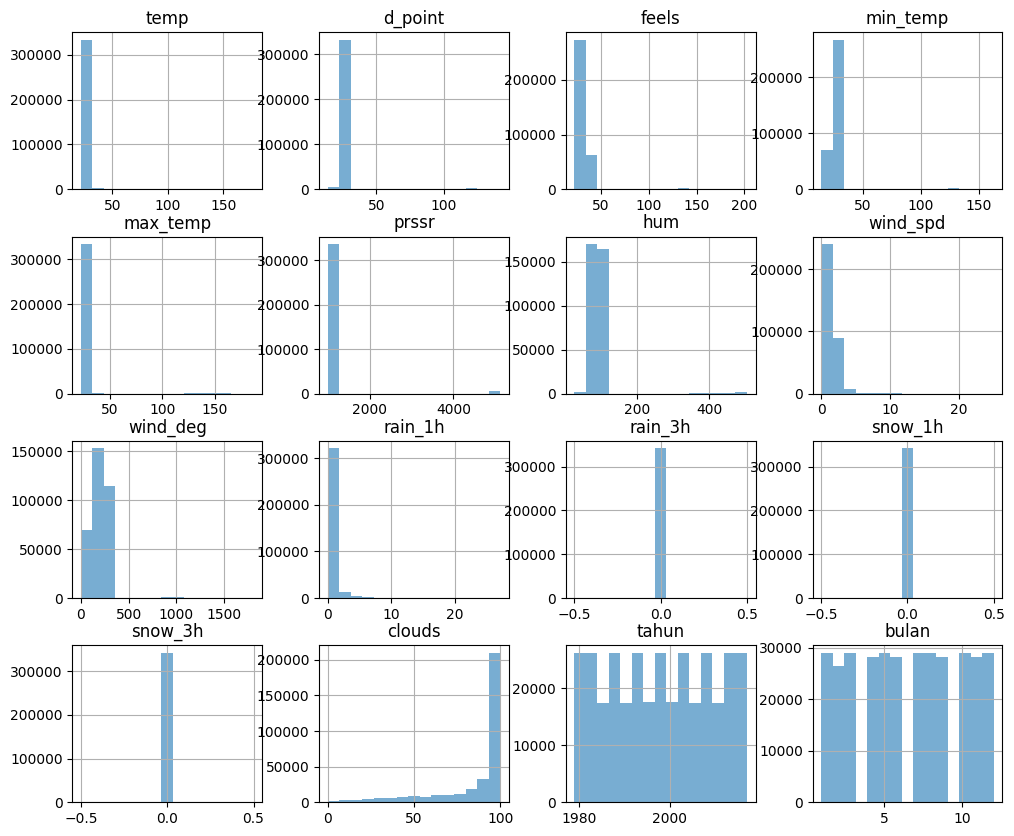

In [31]:
dft.hist(bins=15, figsize=(12,10), alpha=0.6, label=False)

In [32]:
dft.isna().sum()

temp        0
d_point     0
feels       0
min_temp    0
max_temp    0
prssr       0
hum         0
wind_spd    0
wind_deg    0
rain_1h     0
rain_3h     0
snow_1h     0
snow_3h     0
clouds      0
tahun       0
bulan       0
dtype: int64

#Modelling